   Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes Heart_Disease
0           1   69    Male            95.0        122.0       No            No
1           2   32    Male           129.0        191.0       No            No
2           3   89  Female           101.0        214.0       No            No
3           4   78  Female           142.0        203.0       No            No
4           5   38    Male           160.0        217.0       No            No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2

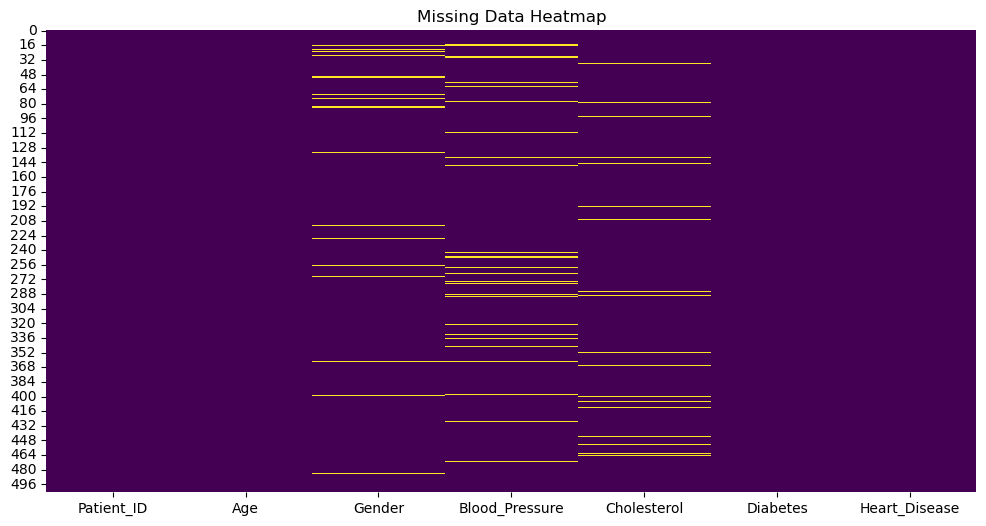

KeyError: "None of [Index(['numerical_column'], dtype='object')] are in the [columns]"

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\PALADUGULLA KARTHIK\Desktop\Healthcare.csv")

# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())

# Describe the dataset to understand numerical features
print(df.describe())
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Analyze the pattern of missing data
# You can use statistical tests or visualizations to determine if data is MCAR, MAR, or MNAR.
from sklearn.impute import SimpleImputer, KNNImputer

# Mean/Median/Mode imputation for numerical columns
mean_imputer = SimpleImputer(strategy='mean')
df['numerical_column'] = mean_imputer.fit_transform(df[['numerical_column']])

median_imputer = SimpleImputer(strategy='median')
df['another_numerical_column'] = median_imputer.fit_transform(df[['another_numerical_column']])

mode_imputer = SimpleImputer(strategy='most_frequent')
df['categorical_column'] = mode_imputer.fit_transform(df[['categorical_column']])

# K-Nearest Neighbors (KNN) imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Regression imputation (if applicable)
# This requires more complex setup and is not shown here for brevity.
# Statistical analysis before and after imputation
before_imputation = df['numerical_column'].describe()
after_imputation = df_knn_imputed['numerical_column'].describe()

print("Before Imputation:\n", before_imputation)
print("After Imputation:\n", after_imputation)

# Visualize the impact using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['numerical_column'], df_knn_imputed['numerical_column']], 
             palette='Set2', orient='h')
plt.xticks([0, 1], ['Before Imputation', 'After Imputation'])
plt.title('Impact of Imputation on Numerical Column')
plt.show()